# Marco Lavorini - Assignment 3

### dataset
Vito,Saverio. (2016). Air Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C59K5F.

In [86]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
air_quality = fetch_ucirepo(id=360) 
  
# data (as pandas dataframes) 
X = air_quality.data.features 
y = air_quality.data.targets 
  
# metadata 
print(air_quality.metadata) 
  
# variable information 
print(air_quality.variables) 


{'uci_id': 360, 'name': 'Air Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/360/air+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/360/data.csv', 'abstract': 'Contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer. ', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 9358, 'num_features': 15, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C59K5F', 'creators': ['Saverio Vito'], 'intro_paper': {'title': 'On field calibration of an electronic nose for benzene estimation in an urban pollution monitoring scenario', 'authors': 'S. D. Vito, E. Massera, M. P

In [87]:
len(X)

9357

In [88]:
X.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [89]:
# drop columns except for the target column 
df = X.drop(['Date','Time','CO(GT)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH', 'AH'], axis=1)

In [90]:
# move 'C6H6(GT)' to the last column
df = df[['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'C6H6(GT)']]


In [91]:
len(df)

9357

In [92]:
# drop all the rows with 'C6H6(GT)' as -200
df = df[df['C6H6(GT)'] != -200]
len(df)

8991

In [93]:
# do the same for all the other columns
df = df[df['PT08.S1(CO)'] != -200]
df = df[df['PT08.S2(NMHC)'] != -200]
df = df[df['PT08.S3(NOx)'] != -200]
df = df[df['PT08.S4(NO2)'] != -200]
df = df[df['PT08.S5(O3)'] != -200]
len(df)

8991

In [94]:
#print the PT08.S1(CO) column
df['PT08.S1(CO)']
#print the min value
df['PT08.S1(CO)'].min()

647

In [95]:
# print the C6H6 column

print(X['C6H6(GT)'][:5])


0    11.9
1     9.4
2     9.0
3     9.2
4     6.5
Name: C6H6(GT), dtype: float64


In [96]:
# count the null values in the C6H6 column
# count how many values are -200
print((df['C6H6(GT)'] == -200).sum())

0


In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [98]:
df.head()

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),C6H6(GT)
0,1360,1046,1056,1692,1268,11.9
1,1292,955,1174,1559,972,9.4
2,1402,939,1140,1555,1074,9.0
3,1376,948,1092,1584,1203,9.2
4,1272,836,1205,1490,1110,6.5


In [99]:
# drop None values
df = df.dropna()
len(df)

8991

In [100]:
# split into train and test sets
dataset = df.values

train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size

# normalize the dataset
X_ = dataset[:, :-1]
y_ = dataset[:, -1]
scaler = MinMaxScaler(feature_range=(0, 1))
X_ = scaler.fit_transform(X_)
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_ = scaler_y.fit_transform(y_.reshape(-1, 1))




"""train = dataset[:train_size,:]
test  = dataset[train_size:len(dataset),:]"""

"""train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]"""


train_X, train_y = X_[:train_size], y_[:train_size]
test_X, test_y = X_[train_size:], y_[train_size:]



# reshape outputs, maybe need to reshape X to have the step embeddend in the shape, it would be (n x 1 x m) instead of n x m

In [101]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
"""train_y = train_y.reshape(-1,1)
test_y = test_y.reshape(-1,1)
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)"""

(7192, 5) (7192, 1) (1799, 5) (1799, 1)


'train_y = train_y.reshape(-1,1)\ntest_y = test_y.reshape(-1,1)\nprint(train_X.shape, train_y.shape, test_X.shape, test_y.shape)'

In [102]:
model =  Sequential()

model.add(LSTM(4, input_shape=(train_X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(1))


c:\Users\chucki\Desktop\projects\ISPR-Midterms\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [103]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [104]:
print(model.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 4)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101 (404.00 B)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [105]:
history = model.fit(train_X, train_y, validation_split=0.2, epochs=20, batch_size=50, verbose=1, shuffle=False)

Epoch 1/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0330 - val_loss: 0.0146
Epoch 2/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0141 - val_loss: 0.0121
Epoch 3/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0111 - val_loss: 0.0098
Epoch 4/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0098 - val_loss: 0.0075
Epoch 5/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0077 - val_loss: 0.0053
Epoch 6/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0061 - val_loss: 0.0035
Epoch 7/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0054 - val_loss: 0.0022
Epoch 8/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0042 - val_loss: 0.0017
Epoch 9/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039 - val_loss: 0.0015
Epoch 10/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037 - val_loss: 0.0015
Epoch 11/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0035 - val_loss: 0.0014
Epoch 12/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

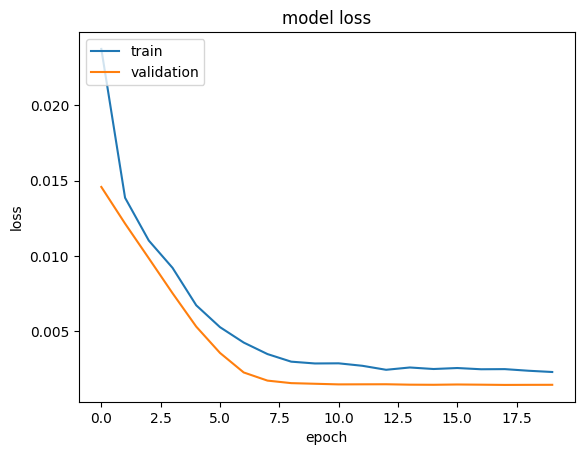

In [106]:
# print the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [107]:
predict = model.predict(test_X)
predict.shape

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


(1799, 1)

In [108]:
test_X

array([[0.29791816, 0.27362097, 0.18043202, 0.22976619, 0.41311903],
       [0.27351041, 0.23484435, 0.19991529, 0.21043165, 0.37141616],
       [0.25556353, 0.23156745, 0.21050402, 0.21133094, 0.34057341],
       ...,
       [0.35534817, 0.37138176, 0.11901737, 0.3102518 , 0.37836664],
       [0.25556353, 0.31567449, 0.16094875, 0.22032374, 0.23848827],
       [0.30437904, 0.36264336, 0.14061838, 0.25989209, 0.25847089]])

In [109]:
predict = scaler_y.inverse_transform(predict)

In [110]:
# calculate root mean squared error
test_y = scaler_y.inverse_transform(test_y)
rmse = math.sqrt(mean_squared_error(test_y, predict))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 1.827


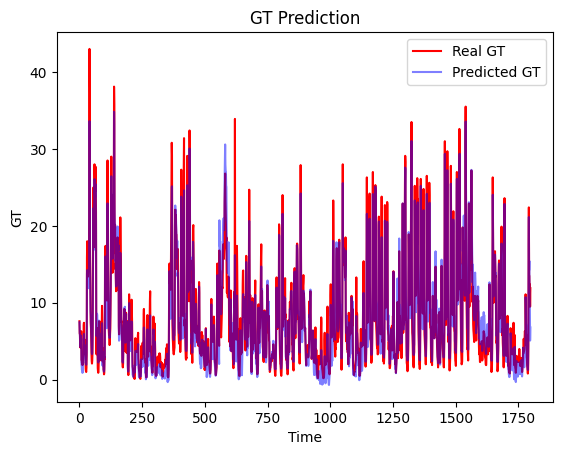

In [111]:
# plot the data
plt.plot(test_y, color = 'red', label = 'Real GT')
plt.plot(predict, color = 'blue', label = 'Predicted GT', alpha=0.5)
plt.title('GT Prediction')

plt.xlabel('Time')
plt.ylabel('GT')
plt.legend()
plt.show()

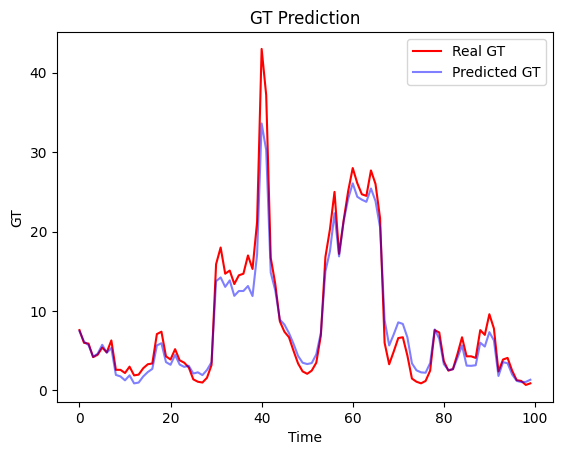

In [112]:
# plot the prediction more readable
plt.plot(test_y[:100], color = 'red', label = 'Real GT')
plt.plot(predict[:100], color = 'blue', label = 'Predicted GT', alpha=0.5)
plt.title('GT Prediction')

plt.xlabel('Time')
plt.ylabel('GT')
plt.legend()
plt.show()



---

# second model

In [113]:


X_2, y_2 = [], []
for i in range(len(y_)-1):
    X_2.append(y_[i])
    y_2.append(y_[i+1])
X_2 = np.array(X_2)
y_2 = np.array(y_2)

In [114]:
print(X_2.shape, y_2.shape)

(8990, 1) (8990, 1)


In [115]:
x_train, y_train = X_2[:train_size], y_2[:train_size]
x_test, y_test = X_2[train_size:], y_2[train_size:]

In [116]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(7192, 1) (7192, 1) (1798, 1) (1798, 1)


# model 2, the same for different data

In [117]:
model2 =  Sequential()

model2.add(LSTM(4, input_shape=(1, 1)))
model2.add(Dropout(0.2))
model2.add(Dense(1))

c:\Users\chucki\Desktop\projects\ISPR-Midterms\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [118]:
model2.compile(loss='mean_squared_error', optimizer='adam')

In [119]:
print(model2.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 4)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101 (404.00 B)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [120]:
history = model2.fit(x_train, y_train, validation_split=0.2, epochs=20, batch_size=50, verbose=1, shuffle=False)

Epoch 1/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0353 - val_loss: 0.0188
Epoch 2/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0134 - val_loss: 0.0157
Epoch 3/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0121 - val_loss: 0.0143
Epoch 4/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0114 - val_loss: 0.0130
Epoch 5/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0105 - val_loss: 0.0116
Epoch 6/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0098 - val_loss: 0.0103
Epoch 7/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0089 - val_loss: 0.0091
Epoch 8/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0082 - val_loss: 0.0080
Epoch 9/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0076 - val_loss: 0.0070
Epoch 10/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0068 - val_loss: 0.0062
Epoch 11/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0063 - val_loss: 0.0055
Epoch 12/20
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

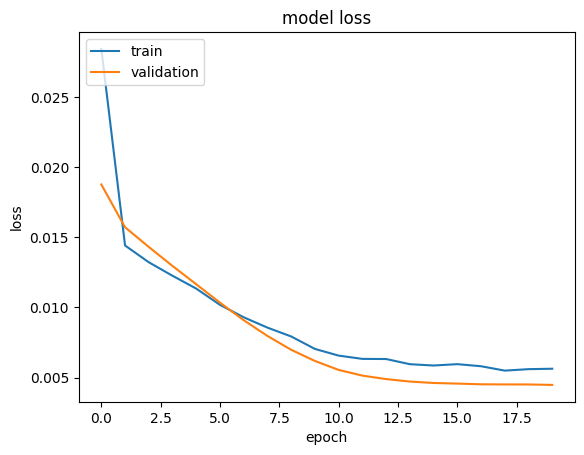

In [121]:
# print the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [124]:
predict2 = model2.predict(x_test)
predict2.shape

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


(1798, 1)

In [125]:
predict2 = scaler_y.inverse_transform(predict2)

In [126]:
# calculate root mean squared error
y_test = scaler_y.inverse_transform(y_test)
rmse2 = math.sqrt(mean_squared_error(y_test, predict2))
print('Test RMSE: %.3f' % rmse2)


Test RMSE: 4.013


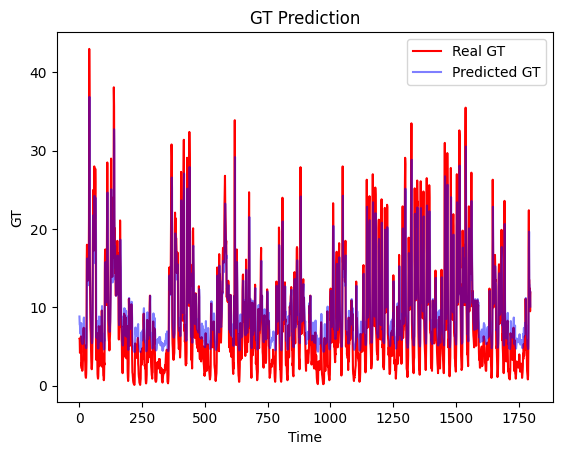

In [127]:
# plot the data
plt.plot(y_test, color = 'red', label = 'Real GT')
plt.plot(predict2, color = 'blue', label = 'Predicted GT', alpha=0.5)
plt.title('GT Prediction')

plt.xlabel('Time')
plt.ylabel('GT')
plt.legend()
plt.show()

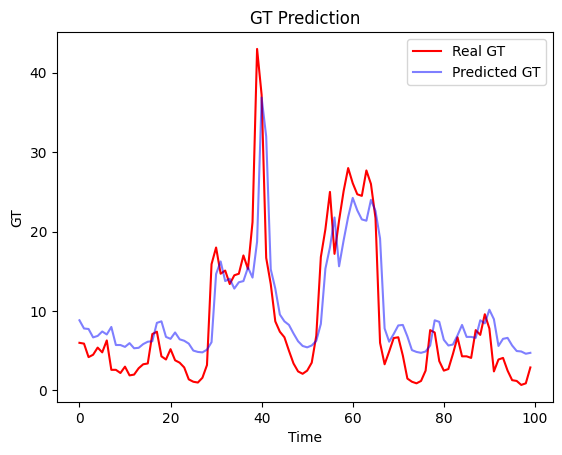

In [128]:
# plot the data
plt.plot(y_test[:100], color = 'red', label = 'Real GT')
plt.plot(predict2[:100], color = 'blue', label = 'Predicted GT', alpha=0.5)
plt.title('GT Prediction')

plt.xlabel('Time')
plt.ylabel('GT')
plt.legend()
plt.show()

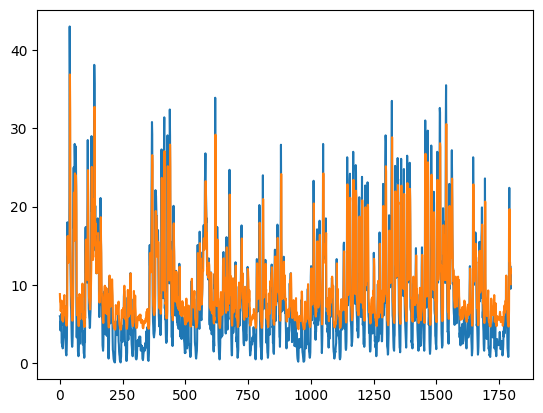

In [129]:
# fill the distance of the 2 function with seaborn
import seaborn as sns
sns.lineplot(x=range(len(y_test)), y=y_test.reshape(-1))
sns.lineplot(x=range(len(predict2)), y=predict2.reshape(-1))


plt.show()



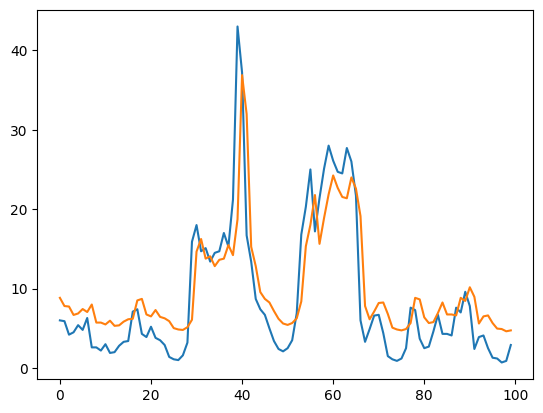

In [130]:
# zoom first 100 values
sns.lineplot(x=range(100), y=y_test[:100].reshape(-1))
sns.lineplot(x=range(100), y=predict2[:100].reshape(-1))
plt.show()
